In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import norm
import numpy as np
import scipy as sp
import pickle

# Import scikit-learn tools, vectorizers, transformer, and classifiers
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# import Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# import Logistic Regression CV Classifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression

# import LinearSVC classifier
from sklearn.svm import LinearSVC

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
# Load in data
with open('dfML.pickle', 'rb') as b:
    df = pickle.load(b)

In [3]:
df.head()

,name,rating,text,clean_text_stem,clean_text_lem,word_count,log_word_count,review_clean,neg,neu,...,word_yell,word_yes,word_yet,word_yogurt,word_york,word_you,word_young,word_zero,polarity,subjectivity
28,Hampton Inn Suites National HarborAlexandria Area,positive,Hotel is in the perfect spot at the perfect pr...,hotel perfect spot perfect price not perfect v...,hotel perfect spot perfect price not perfect v...,279,5.631212,hotel perfect spot perfect price perfect view ...,0.045,0.763,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.248810,0.458185
29,Hampton Inn Suites National HarborAlexandria Area,positive,Excellent experience. Will come again and book...,excel experience come book stay futurenic locat,excellent experience come book stay futurenice...,12,2.484907,excellent experience come book stay futurenice...,0.000,0.748,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,1.000000
30,Hampton Inn Suites National HarborAlexandria Area,negative,"heat in room did not work properly, tv remote ...",heat room not work properly tv remot wa broken...,heat room not work properly tv remote break ex...,14,2.639057,heat room work properly tv remote broken exces...,0.193,0.807,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,-0.250000,0.533333
31,Hampton Inn Suites National HarborAlexandria Area,positive,"Even though we were having problems, i.e. Feat...",even though problems e feather allergy flat ti...,even though problem e feather allergy flat tir...,25,3.218876,even though problem i.e feather allergy flat t...,0.087,0.707,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,-0.012500,0.562500
32,Hampton Inn Suites National HarborAlexandria Area,positive,Brand new hotel in brand new retail area on th...,brand new hotel brand new retail area water ea...,brand new hotel brand new retail area water ea...,111,4.709530,brand new hotel brand new retail area water ea...,0.050,0.845,...,0.0,0.0,0.0,0.0,0.0,0.158894,0.0,0.0,0.112746,0.637174


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3976 entries, 28 to 9812
Columns: 1568 entries, name to subjectivity
dtypes: float32(5), float64(1554), int64(3), object(6)
memory usage: 47.5+ MB


In [5]:
reviews = [
    (df['rating'] == 'positive'),

]
rating = [0]
df['rating'] = np.select(reviews, rating, default=1)
df.rating.value_counts()

0    3029
1     947
Name: rating, dtype: int64

In [6]:
# Store tweet dataset into feature matrix and response vector
X_words = df['clean_text_lem']
y_words = df['rating']

# Instantiate CountVectorizer and TfidfVectorizer
count_vect = CountVectorizer(min_df=1, ngram_range=(1, 2)) 
tfidf_vect = TfidfVectorizer(min_df=1, ngram_range=(1, 2))


# Apply CountVectorizer 
X_count = count_vect.fit_transform(df['clean_text_lem'].apply(str))
X_count = X_count.tocsc() 

# Apply TfidfVectorizer
X_tfidf = tfidf_vect.fit_transform(df['clean_text_lem'].apply(str))
X_tfidf = X_tfidf.tocsc()


# Split train/test data for all data
Xtrain_count, Xtest_count, ytrain_count, ytest_count = train_test_split(X_count, y_words, test_size = 0.2,  random_state=42)
Xtrain_tfidf, Xtest_tfidf, ytrain_tfidf, ytest_tfidf = train_test_split(X_tfidf, y_words,  test_size = 0.2, random_state=42)

In [7]:
# Instantiate MultinomialNB() for CountVectorizer
nb_overall = MultinomialNB(alpha=1, fit_prior=True)

# Train model
nb_overall.fit(Xtrain_count, ytrain_count)

# Make predictions for Xtest
y_pred_count = nb_overall.predict(Xtest_count)

# Calculate F1 Score
f1 = metrics.f1_score(ytest_count, y_pred_count)

print(classification_report(ytest_count, y_pred_count))

# Confusion matrix
cm = metrics.confusion_matrix(ytest_count, y_pred_count)

# Calculate predicted probabilities for Xtest
y_prob_count = nb_overall.predict_proba(Xtest_count)[:,1]

# Calculate AUC for Naive Bayes model with CountVec
auc = metrics.roc_auc_score(ytest_count, y_prob_count)

print(count_vect)
print('\nF1 Score: ', f1)
print('\nConfusion Matrix:\n', cm)
print('\nAUC: ', auc)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       596
           1       0.72      0.63      0.67       200

    accuracy                           0.85       796
   macro avg       0.80      0.77      0.79       796
weighted avg       0.84      0.85      0.84       796

CountVectorizer(ngram_range=(1, 2))

F1 Score:  0.6719999999999999

Confusion Matrix:
 [[547  49]
 [ 74 126]]

AUC:  0.8825671140939597


Using CountVectorizer, at baseline the Naive Bayes model correctly predicted 526 "positive" overall ratings. Likewise, 145 were correctly predicted to be "negative" overall ratings.

However, 55 reviews were incorrectly predicted to be "positive" overall ratings and 70 were incorrectly predicted to be "negative" overall ratings.

Let's see how the TfidfVectorizer does.

In [8]:
# Instantiate multinomialNB() for TfidfVectorizer
nb_tfidf_overall = MultinomialNB(alpha=1, fit_prior=True)

# Train model
nb_tfidf_overall.fit(Xtrain_tfidf, ytrain_tfidf)

# Make predictions for Xtest1
y_pred_tfidf = nb_tfidf_overall.predict(Xtest_tfidf)

# Calculate F1 Score
f1 = metrics.f1_score(ytest_tfidf, y_pred_tfidf)

print(classification_report(ytest_tfidf, y_pred_tfidf))

# Confusion matrix
cm = metrics.confusion_matrix(ytest_tfidf, y_pred_tfidf)

# Calculate predicted probabilities for Xtest1
y_prob_tfidf = nb_tfidf_overall.predict_proba(Xtest_tfidf)[:,1]

# Calculate AUC for Naive Bayes model with Tfidf
auc = metrics.roc_auc_score(ytest_tfidf, y_prob_tfidf)

print(tfidf_vect)
print('\nF1 Score: ', f1)
print('\nConfusion Matrix:\n', cm)
print('\nAUC: ', auc)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       596
           1       0.00      0.00      0.00       200

    accuracy                           0.75       796
   macro avg       0.37      0.50      0.43       796
weighted avg       0.56      0.75      0.64       796

TfidfVectorizer(ngram_range=(1, 2))

F1 Score:  0.0

Confusion Matrix:
 [[596   0]
 [200   0]]

AUC:  0.8345721476510066


C:\Tanuj\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Tanuj\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Tanuj\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Using TfidfVectorizer at baseline, the Naive Bayes model correctly predicted 529 "Positive" overall ratings and 0 "low" overall ratings.

However, 200 reviews were incorrectly predicted to be "positive" overall ratings and 0 for "low" overall ratings.

This did really well for positive ratings but really poorly for negative reviews. We need to tune parameters and adjust threshold to see if this can perform better than count.

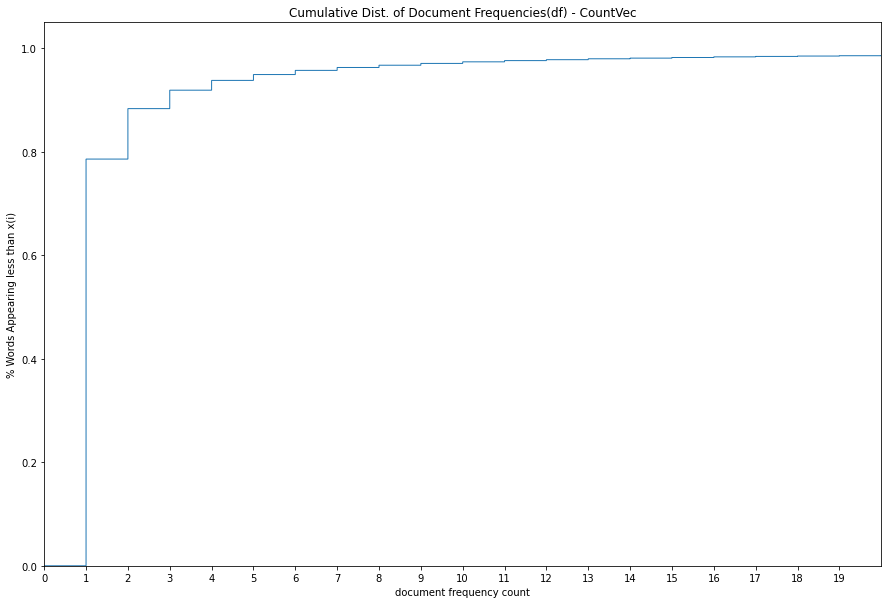

In [9]:
words = list((X_count>0).sum(axis=0).tolist()[0])

fig, ax = plt.subplots(figsize=(15,10))
bins = np.arange(sum(words))
plt.hist(words, bins=bins, histtype='step', density=True, cumulative=True)
plt.xlim(0,20)
plt.xticks([x for x in range(0,20,1)])
plt.xlabel('document frequency count')
plt.ylabel('% Words Appearing less than x(i)')
plt.title('Cumulative Dist. of Document Frequencies(df) - CountVec')
plt.show()

In [10]:
best_df = None
best_auc = -np.inf
best_f1 = None
pos_df = [.0001, .001, .01, .1, 1,3,10,25,50]

for min_df in pos_df:
    vect = CountVectorizer(min_df=min_df, ngram_range=(1, 2)) 
    
    X = vect.fit_transform(df.clean_text_lem.apply(str))
    X = X.tocsc() 
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_words, random_state=17)
    
    nb = MultinomialNB(alpha=1, fit_prior=True)
    nb.fit(Xtrain, ytrain)
    y_pred_count = nb.predict(Xtest)
    f1 = metrics.f1_score(ytest, y_pred_count)
    y_prob_count = nb.predict_proba(Xtest)[:,1]
    auc = metrics.roc_auc_score(ytest, y_prob_count)
    if auc > best_auc:
        best_auc = auc
        best_df = min_df
        best_f1 = f1

print('\n Best Values: \n Min_df: {}, Auc: {}, F1: {}'.format(best_df, best_auc, best_f1))


 Best Values: 
 Min_df: 0.001, Auc: 0.9104368300315351, F1: 0.7187500000000001


In [11]:
best_df = None
best_auc = -np.inf
best_f1 = None
pos_df = [.0001, .001, .01, .1, 1,3,10,25,50]

for min_df in pos_df:
    vect = TfidfVectorizer(min_df=min_df, ngram_range=(1, 2)) 
    
    X = vect.fit_transform(df.clean_text_lem.apply(str))
    X = X.tocsc() 
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_words, random_state=17)
    
    nb = MultinomialNB(alpha=1, fit_prior=True)
    nb.fit(Xtrain, ytrain)
    y_pred_count = nb.predict(Xtest)
    f1 = metrics.f1_score(ytest, y_pred_count)
    y_prob_count = nb.predict_proba(Xtest)[:,1]
    auc = metrics.roc_auc_score(ytest, y_prob_count)
    if auc > best_auc:
        best_auc = auc
        best_df = min_df
        best_f1 = f1

print('\n Best Values: \n Min_df: {}, AUC: {}, F1: {}'.format(best_df, best_auc, best_f1))


 Best Values: 
 Min_df: 0.001, AUC: 0.9144558842221858, F1: 0.46975088967971523


In [12]:
# Instantiate Vectorizers with new min_df 
vect_all = CountVectorizer(min_df=.001, ngram_range=(1, 2)) 
tfidf_vect_all = TfidfVectorizer(min_df=.001, ngram_range=(1, 2))

# Apply CountVectorizer 
X_all_C = vect_all.fit_transform(df.clean_text_lem.apply(str))
X_all_C = X_all_C.tocsc() 

# Apply TfidfVectorizer
X_all_idf = tfidf_vect_all.fit_transform(df.clean_text_lem.apply(str))
X_all_idf = X_all_idf.tocsc() 

# Split train/test data for all data
# This is for CountVectorizer
Xtrain_all_C, Xtest_all_C, ytrain_all_C, ytest_all_C = train_test_split(X_all_C, y_words, random_state=17)

# This is for Tfidf Vectorizer
Xtrain_all_idf, Xtest_all_idf, ytrain_all_idf, ytest_all_idf = train_test_split(X_all_idf, y_words, random_state=17)

In [13]:
# Create a list of parameters for tuning
parameters = {'fit_prior': (True, False),
              'alpha': (0.001, 0.01, 0.1, 1, 5, 10,25,50),
             }

In [14]:
# Perform GridSearch on Naive Bayes using the given parameters and CountVectorizer
gs_count_all = GridSearchCV(MultinomialNB(), parameters, scoring='roc_auc', n_jobs=-1, cv=5)
gs_count_all.fit(Xtrain_all_C, ytrain_all_C)

# Show the best score and parameters used
print(gs_count_all)
print('\nBest Score: ', gs_count_all.best_score_)

GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': (0.001, 0.01, 0.1, 1, 5, 10, 25, 50),
                         'fit_prior': (True, False)},
             scoring='roc_auc')

Best Score:  0.8831103282729117


In [15]:
# Perform GridSearch on Naive Bayes using the given parameters and TfidfVectorizer
gs_tfidf_all = GridSearchCV(MultinomialNB(), parameters, scoring='roc_auc', n_jobs=-1, cv=5)
gs_tfidf_all.fit(Xtrain_tfidf, ytrain_tfidf)

# Show the best score and parameters used
print(gs_tfidf_all)
print('\nBest Score: ', gs_tfidf_all.best_score_)


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': (0.001, 0.01, 0.1, 1, 5, 10, 25, 50),
                         'fit_prior': (True, False)},
             scoring='roc_auc')

Best Score:  0.8819316332790009


In [16]:
# Calculate predicted probabilities for Xtest1
y_prob_nb = gs_tfidf_all.predict_proba(Xtest_tfidf)[:,1]

# Calculate AUC for Naive Bayes model with CountVec
auc = metrics.roc_auc_score(ytest_tfidf, y_prob_nb)

print('AUC: ', auc)

AUC:  0.8886744966442953


In [17]:
def get_predictive_features(vectorizer, test_set, classifier):
    """ 
    This function takes into account the vectorizer, test set, and classifier to output the predictive features of a dataset.
    """
    
    words = np.array(vectorizer.get_feature_names())
    x = np.eye(test_set.shape[1])
    probs = classifier.predict_log_proba(x)[:,0]
    ind = np.argsort(probs)
    
    high_words = words[ind[:10]]
    low_words = words[ind[-10:]]

    high_prob = probs[ind[:10]]
    low_prob = probs[ind[-10:]]

    print("High Overall Words\t     P(high | word)")
    for w, p in zip(high_words, high_prob):
        print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
    print("Low Overall Words\t     P(low | word)")
    for w, p in zip(low_words, low_prob):
        print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

In [18]:
get_predictive_features(vectorizer=vect_all , test_set=Xtest_all_C, classifier=gs_count_all)


C:\Tanuj\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


High Overall Words	     P(high | word)
              refuse 0.97
      bad experience 0.97
            go front 0.96
             room ok 0.96
                burn 0.96
             apology 0.96
             discuss 0.96
              mildew 0.96
          apparently 0.96
                yell 0.96
Low Overall Words	     P(low | word)
    highly recommend 0.08
    great experience 0.08
      french quarter 0.07
           enjoyable 0.06
           good love 0.06
          charleston 0.06
    would definitely 0.06
              french 0.06
         great price 0.06
     definitely stay 0.05


In [19]:
# Select the rows where the "names" column is "Metro Points Hotel-Washington North"
top_hotel = df[df["name"] == "Metro Points Hotel-Washington North"]

In [20]:
top_hotel.head()

,name,rating,text,clean_text_stem,clean_text_lem,word_count,log_word_count,review_clean,neg,neu,...,word_yell,word_yes,word_yet,word_yogurt,word_york,word_you,word_young,word_zero,polarity,subjectivity
5517,Metro Points Hotel-Washington North,1,Floors in lobby need to be cleaned and waxed n...,floor lobbi need clean wax no ac elev hallway ...,floor lobby need clean wax no ac elevator hall...,29,3.367296,floor lobby need clean waxed ac elevator hallw...,0.081,0.883,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
5518,Metro Points Hotel-Washington North,0,I stayed 4 nights while attending a conference...,stay night attend confer elsewher c area wa lo...,stay night attend conference elsewhere c area ...,117,4.762174,stay night attend conference elsewhere d.c are...,0.016,0.891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.199792,0.469583
5519,Metro Points Hotel-Washington North,1,"Comfortable room, continental breakfast was te...",comfort room continent breakfast wa terribl th...,comfortable room continental breakfast terribl...,8,2.079442,comfortable room continental breakfast terribl...,0.250,0.484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.300000,0.900000
5520,Metro Points Hotel-Washington North,1,We just stayed one night but my boyfriend said...,stay one night boyfriend said wa odor first we...,stay one night boyfriend say odor first go not...,31,3.433987,stayed one night boyfriend say odor first go b...,0.000,0.885,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.225000,0.500000
5521,Metro Points Hotel-Washington North,1,It was a bad experience for me. The first room...,wa bad experi first room check ceil water stai...,bad experience first room check ceiling water ...,155,5.043425,bad experience first room checked ceiling wate...,0.079,0.921,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.230808,0.462626


In [21]:
# Store overall beer dataset into feature matrix and response vector
X_hef = top_hotel['clean_text_lem']
y_hef = (top_hotel.rating == 0).values.astype(np.int)

# Instantiate TfidfVectorizer
tfidf_vect_hef = TfidfVectorizer(min_df=25, ngram_range=(1, 3))

# Apply TfidfVectorizer
X_hef = tfidf_vect_hef.fit_transform(top_hotel.clean_text_lem.apply(str))
X_hef = X_hef.tocsc() 

# Split dataset into train/test data
Xtrain_hef, Xtest_hef, ytrain_hef, ytest_hef = train_test_split(X_hef, y_hef, random_state=17)

# Instantiate multinomialNB() for TfidfVectorizer
nb_tfidf_hef = MultinomialNB(alpha=1, fit_prior=True)

# Train model
nb_tfidf_hef.fit(Xtrain_hef, ytrain_hef)

get_predictive_features(vectorizer=tfidf_vect_hef, test_set=Xtest_hef ,classifier=nb_tfidf_hef)

High Overall Words	     P(high | word)
            friendly 0.81
               great 0.80
                nice 0.76
               clean 0.74
         comfortable 0.73
            location 0.72
                  dc 0.72
               price 0.72
             station 0.71
               metro 0.70
Low Overall Words	     P(low | word)
             service 0.61
                stay 0.61
                well 0.56
                area 0.55
                room 0.50
               night 0.49
                take 0.44
                 not 0.40
                 one 0.37
                  no 0.32


<ipython-input-21-e392e975112a>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_hef = (top_hotel.rating == 0).values.astype(np.int)
C:\Tanuj\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
top_hotels = df.loc[df['name'].isin(['Metro Points Hotel-Washington North', 'The Westin Las Vegas Hotel & Spa', 'Best Western Springfield', 'ARIA Resort Casino', 'Kinzie Hotel'])]
top_hotels = top_hotels.sort_values('name')

In [23]:
# Store overall beer dataset into feature matrix and response vector
X_hef = top_hotels['clean_text_lem']
y_hef = (top_hotels.rating == 0).values.astype(np.int)

# Instantiate TfidfVectorizer
tfidf_vect_hef = TfidfVectorizer(min_df=10, ngram_range=(1, 3))

# Apply TfidfVectorizer
X_hef = tfidf_vect_hef.fit_transform(top_hotels.clean_text_lem.apply(str))
X_hef = X_hef.tocsc() 

# Split dataset into train/test data
Xtrain_hef, Xtest_hef, ytrain_hef, ytest_hef = train_test_split(X_hef, y_hef, random_state=17)

# Instantiate multinomialNB() for TfidfVectorizer
nb_tfidf_hef = MultinomialNB(alpha=1, fit_prior=True)

# Train model
nb_tfidf_hef.fit(Xtrain_hef, ytrain_hef)

get_predictive_features(vectorizer=tfidf_vect_hef, test_set=Xtest_hef ,classifier=nb_tfidf_hef)

High Overall Words	     P(high | word)
            friendly 0.94
               strip 0.94
                view 0.93
               great 0.93
             perfect 0.93
              modern 0.92
                love 0.92
             amazing 0.92
         comfortable 0.92
               comfy 0.92
Low Overall Words	     P(low | word)
       not recommend 0.51
              decent 0.51
                 run 0.49
            internet 0.46
               smell 0.46
                  ok 0.45
              toilet 0.44
               dirty 0.42
                sign 0.42
           hot water 0.41


<ipython-input-23-76f6b4100c0f>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_hef = (top_hotels.rating == 0).values.astype(np.int)
C:\Tanuj\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
# Instantiate multinomialNB()
nb_words_count = MultinomialNB(alpha=1, fit_prior=True)
nb_words_tfidf = MultinomialNB(alpha=1, fit_prior=True)

# Train model
nb_words_count.fit(Xtrain_count, ytrain_count)
nb_words_tfidf.fit(Xtrain_tfidf, ytrain_tfidf)

MultinomialNB(alpha=1)

In [25]:
# Create the feature and target arrays for modeling the sarcasm training data using classifier algorithms

# Create the feature array
X = df.clean_text_lem

# Create the target array 
y = df['rating'].values.astype(np.int) 
# Split the sarcasm data's target and feature arrays into training an

<ipython-input-25-12744865795c>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = df['rating'].values.astype(np.int)


In [26]:

# Split the sarcasm data's target and feature arrays into training and testing splits

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Vectorize the training and test feature array splits

# Instantiate CountVectorizer
vectorizer = TfidfVectorizer()

# learn the vocabulary and create a document-term matrix (DTM)/sparse array for the training split features of the sarcasm data
# Reassign the training features
X_train = vectorizer.fit_transform(X_train)

# Create a document-term matrix based on the training data DTM/sparse array for the test split features of the sarcasm data
# Reassign the testing features
X_test = vectorizer.transform(X_test)

In [28]:

# Model selection and model tuning
# Function for executing classifier algorithms, outputing performance metrics and the best hyperparameters for each classifier

def evaluate_model(Xtest_all_idf, ytest_all_idf, clf, parameters):
    
    print("Name of classifier: ",clf)
    
    # Instantiate an instance of GridsearchCV
    grid = GridSearchCV(clf, parameters, n_jobs = -1, scoring = 'roc_auc')
    
    # Fit the gridsearch model to the training splits - the DTM/sparse array and the target 
    grid_search = grid.fit(Xtrain_all_idf, ytrain_all_idf)
    
    # Make predictions for X_test DTM/sparse array based on the best parameters.The refitted GridSearchCV estimator...
    #....is made available as the best_estimator_ attribute and permits using predict ...
    #...directly on this GridSearchCV instance. Predict produces binary classifications predictions 
    y_pred = grid_search.predict(Xtest_all_idf)
    
    # Create a confusion matrix comparing the test target values with the predicted values
    cm = metrics.confusion_matrix(ytest_all_idf, y_pred)
    
    # Print the best score based on the scoring method, in this case 'roc_auc'
    # Mean cross-validated score of the best_estimator
    print("Best ROC AUC score:", grid_search.best_score_) 
    
    # Print a classification report for the best model
    print(classification_report(ytest_all_idf, y_pred))
    print('\nConfusion Matrix:\n', cm)

    # Print the best parameters identified by gridsearching
    print("Best Parameters:", grid_search.best_params_)
    
# Reference: https://github.com/sdesaidata/Springboard/blob/master/Capstone2_TweetsandMusic_Predictor/5__MachineLearning.ipynb
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [29]:
# Classifier algorithms for testing and their respective hyperparameter search grids
# Commented-out the search grid for random forest classisfier due to long processing time

# Algorithms to compare
MNB = MultinomialNB()
LR = LogisticRegression()
LSVC = LinearSVC()

# Search grids for classifier-specific parameters
algos_params ={MNB:{'alpha':[0.01, 0.05, 0.1, 0.15, 0.25, 0.5, 1, 1.5, 2.5, 5, 7.5, 10, 15, 50]}, 
               LR:{'C': [0.001, 0.1, 1, 10, 100]},
               LSVC:{'C': [0.001, 0.1, 1, 10, 100]}}

In [30]:
# Compare the performance of classifier algorithms by iteratively calling the 'evaluate_model' function on all the ...
#...classifier algorithms except random forest classifier due to lengthy process time
# Call the random forest classifier separately (below)

for k, v in algos_params.items():evaluate_model(Xtest_all_idf, ytest_all_idf, k, v)
    

Name of classifier:  MultinomialNB()
Best ROC AUC score: 0.891728168057153
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       783
           1       0.81      0.66      0.73       211

    accuracy                           0.90       994
   macro avg       0.86      0.81      0.83       994
weighted avg       0.89      0.90      0.89       994


Confusion Matrix:
 [[751  32]
 [ 72 139]]
Best Parameters: {'alpha': 0.15}
Name of classifier:  LogisticRegression()
Best ROC AUC score: 0.8901123162160388
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       783
           1       0.93      0.46      0.62       211

    accuracy                           0.88       994
   macro avg       0.90      0.73      0.77       994
weighted avg       0.89      0.88      0.86       994


Confusion Matrix:
 [[776   7]
 [113  98]]
Best Parameters: {'C': 1}
Name of classifier:  LinearSVC()
Best ROC AUC

In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# Fit the classifiers using the best parameters identified by gridsearching
# Produce roc curves and calculate roc scores for each classifier

LR = LogisticRegression(C = 1)
LR.fit(Xtrain_all_idf, ytrain_all_idf)
LR_probs = LR.predict_proba(Xtest_all_idf)
LR_probs = LR_probs[:, 1]
LR_fpr, LR_tpr, LR_thresholds = roc_curve(ytest_all_idf, LR_probs)
LR_auc = roc_auc_score(ytest_all_idf, LR_probs)
print('Logistic Regression AUC: %.4f' % LR_auc)

MNB = MultinomialNB(alpha = 0.15)
MNB.fit(Xtrain_all_idf, ytrain_all_idf)
MNB_probs = MNB.predict_proba(Xtest_all_idf)
MNB_probs = MNB_probs[:, 1]
MNB_fpr, MNB_tpr, MNB_thresholds = roc_curve(ytest_all_idf, MNB_probs)
MNB_auc = roc_auc_score(ytest_all_idf, MNB_probs)
print('Multinomial naive Bayes AUC: %.4f' % MNB_auc)

LSVC = LinearSVC(C = 0.1)
LSVC.fit(Xtrain_all_idf, ytrain_all_idf)
LSVC_probs = LSVC.decision_function(Xtest_all_idf)
#LSVC_probs = LSVC_probs[:, 1]
LSVC_fpr, LSVC_tpr, LSVC_thresholds = roc_curve(ytest_all_idf, LSVC_probs)
LSVC_auc = roc_auc_score(ytest_all_idf, LSVC_probs)
print('Linear Support Vector Classifier AUC: %.4f' % LSVC_auc)

Logistic Regression AUC: 0.9154
Multinomial naive Bayes AUC: 0.9197
Linear Support Vector Classifier AUC: 0.9139


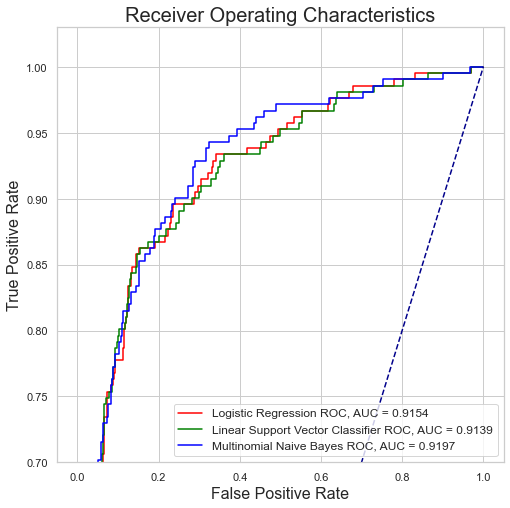

In [32]:
# Plot the roc curves for each classifier using their best hyperparameters

sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
plt.plot(LR_fpr, LR_tpr, color='red', label='Logistic Regression ROC, AUC = 0.9154')
plt.plot(LSVC_fpr, LSVC_tpr, color='green', label='Linear Support Vector Classifier ROC, AUC = 0.9139')
plt.plot(MNB_fpr, MNB_tpr, color='blue', label='Multinomial Naive Bayes ROC, AUC = 0.9197')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.title("Receiver Operating Characteristics", fontsize = 20)
plt.legend(loc='best', fontsize  = 12)
plt.xlabel("False Positive Rate", fontsize = 16)
plt.ylabel("True Positive Rate", fontsize = 16)
plt.ylim(0.7,1.03)
plt.savefig('capstone2_roc_auc.png')

# Reference: # https://stackabuse.com/understanding-roc-curves-with-python/